In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
import pywt


import tensorflow as tf
import tensorflow_addons as tfa

import os
from google.colab import drive
drive.mount('/content/drive')

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of replicas: 1
2.12.0


In [ ]:
def data_clean (image,x,y, h, label, L, newpath, img):
  hist = cv2.calcHist([image], [0], None, [256], [0, 256])
  if (np.where(hist == max(hist))[0][0] != 0) :
    h.append([image,label])    # in case n9lboha data frame (kayen 3efsa whdokhra l images mais jsp maa)
    x.append(image)
    y.append(label)
    # cv2.imwrite(f'{newpath}/{label}_____{img}', image)
  else :
    if(max(hist)/(image.shape[0]*image.shape[1])<0.7):
      h.append([image,label])
      x.append(image)
      y.append(label)
      # cv2.imwrite(f'{newpath}/{label}_____{img}', image)
    else:
      L.append(label)

In [ ]:
# creating dataset

datacleaned = []
h=[]
x=[]
y=[]

newpath = '/content/drive/MyDrive/PFE/MMU+casiacleaned'
for root, dir, images in os.walk('/content/drive/MyDrive/PFE/casiaaa'):
    for img in images:
        if ((img.endswith('jpg')) or (img.endswith('bmp'))) and (not((img.endswith(').jpg')) or (img.endswith(').bmp')))) :       
            path= os.path.join(root, img)
            label = img[:5]

            imag = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            if len(imag) != 0 :
              # LL  = pywt.dwt2(img, 'bior2.2' )
              imag= cv2.resize(imag, (128,128) , interpolation = cv2.INTER_AREA)
              data_clean(imag,x,y,h, label , datacleaned, newpath, img)


for root, dir, images in os.walk('/content/drive/MyDrive/PFE/MMUseg'):
    for img in images:
         if ((img.endswith('jpg')) or (img.endswith('bmp'))) and (not((img.endswith(').jpg')) or (img.endswith(').bmp')))) :     
            path= os.path.join(root, img)
            label = img[:3]

            imag = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            if len(imag) != 0 :
              imag= cv2.resize(imag, (128,128) , interpolation = cv2.INTER_AREA)
              data_clean(imag,x,y,h, label , datacleaned, newpath, img)



print(len(x))
print(len(datacleaned))


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y= le.fit_transform(y)

# y = tf.keras.utils.to_categorical(y, 108)    # one hot encoding  roh takhraaa

x=np.array(x)
y=np.array(y)
h=np.array(h)

939
423


<ipython-input-21-7a60f63582f3>:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  h=np.array(h)


In [ ]:
import os
ts =[]
for root, dir, images in os.walk('/content/drive/MyDrive/PFE/MMU+casiacleaned'):
    for img in images:
      ts.append(img)
len(ts)

0

In [ ]:
np.unique(datacleaned, return_counts=True)

(array(['S3011', 'S3012', 'S3161', 'S3162', 'S3272', 'S3511', 'S3512',
        'S3691', 'S3692', 'S3751', 'S3752', 'S3781', 'S3782', 'S3791',
        'S3792', 'S3801', 'S3802', 'S3811', 'S3812', 'S3821', 'S3822',
        'S3831', 'S3832', 'S3841', 'S3842', 'S3851', 'S3852', 'S3861',
        'S3862', 'S3871', 'S3872', 'S3881', 'S3882', 'S3891', 'S3892',
        'S3901', 'S3902', 'S6873', 'S6879', 'S6881', 'S6883', 'S6885',
        'S6886', 'S6887', 'S6888', 'S6889', 'S6890', 'S6897', 'S6898',
        'S6899', 'S6904', 'S6905', 'S6907', 'S6908', 'lec', 'lok', 'mar',
        'phi', 'sal', 'vim'], dtype='<U5'),
 array([ 5,  9, 10,  7,  1, 10,  6, 10,  1, 16, 16, 13, 20, 16, 13,  8,  5,
        11,  7,  7,  2,  1,  3,  4,  9,  4,  4, 12, 17,  9,  8, 18,  7, 15,
         8,  8,  5,  2,  3,  7,  3,  3,  4,  3,  7,  8,  2,  8,  7,  3,  5,
         4,  6,  4,  4,  1,  4,  2,  6,  2]))

In [ ]:
f,n = np.unique(y, return_counts=True)   # nbr de classes  108   bin casiaaa w mmu
# plt.scatter(f,n)
f.shape   

(108,)

In [ ]:
print(len(datacleaned))  # mmu et casia 9a3do 1000 men 1500 apres datacleaning
y.shape

423


(939,)

In [ ]:
# data = pd.DataFrame(h, columns =['Images','Label'])     just in case we need dataframe
# data.tail()

In [ ]:
xtr, xts, ytr, yts = train_test_split(x,y, test_size=0.2)

In [ ]:
METRICS = [tf.keras.metrics.SparseCategoricalAccuracy(name='sparse_categorical_accuracy'),      # hadi haka ay tsra fiha problem idk why
           tf.keras.metrics.AUC(name='auc'),   
           tfa.metrics.F1Score(num_classes=108)]     # 52 ta3 AMF lba9i casia
EPOCHS = 10

In [ ]:
# dynamic learning rate
def exponential_decay(lr0, s):     # i need to search what is s and wch kayen type of learning rate schedulers mais mzl i didnt use it yet hada but fhamt wch aw sari.
    def exponential_decay_fn(epoch):       # this is an inner function, 3ndhom many uses hado such as : encapsulation and preserve the inner function from ga3 wch ysra bara l outter function
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)   # callbacks : fct li they take as argument other functions

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)

In [ ]:
CNN = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128,128,1)),
    tf.keras.layers.Conv2D(96, (11,11), strides = (4,4), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.ZeroPadding2D(padding= (2,2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.ZeroPadding2D(padding= (1,1)),
    tf.keras.layers.Conv2D(8, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(108, activation='softmax')
                             ])

In [ ]:
CNN.compile( optimizer='adam', loss="sparse_categorical_crossentropy",  metrics= [tfa.metrics.F1Score(num_classes= 44, average='micro'), 'accuracy'])   # seyit cosine similarity loss yekhrej fiha problem idk kifch we do i justed tested hakak brk 
# CNN.summary()


In [ ]:
# from sklearn.model_selection import cross_validate

# _scoring = ['accuracy', 'precision', 'recall', 'f1']
# results = cross_validate(estimator=CNN,
#                                X=xtr,
#                                y=ytr,
#                                cv= 5,
#                                scoring=_scoring,
#                                return_train_score=True)

In [ ]:
# pipe = Pipeline([('CNN', CNN), ('svc', SVC())])   # matemchich .... pipeline yaccepti ghir transformers, and cnn hadik marahich transformer so we need to find kifch nmechoha
# pipe.fit(xtr,ytr)

In [ ]:
# CNN training   (we need to do it ki b svm ki blach)
CNN.fit(
    xtr,ytr,
    # batch_size = 128,
    # validation_data=xval,      # xval necreyiha apres
    #callbacks=[lr_scheduler, my_callback],
    epochs=20
)

Epoch 1/20
24/24 [==============================] - 12s 387ms/step - loss: 5.0108 - f1_score: 0.0185 - accuracy: 0.0120
Epoch 2/20
24/24 [==============================] - 8s 329ms/step - loss: 4.6363 - f1_score: 0.0185 - accuracy: 0.0240
Epoch 3/20
24/24 [==============================] - 9s 388ms/step - loss: 4.6732 - f1_score: 0.0185 - accuracy: 0.0186
Epoch 4/20
24/24 [==============================] - 10s 405ms/step - loss: 4.5653 - f1_score: 0.0185 - accuracy: 0.0306
Epoch 5/20
24/24 [==============================] - 8s 309ms/step - loss: 4.5533 - f1_score: 0.0185 - accuracy: 0.0306
Epoch 6/20
24/24 [==============================] - 9s 400ms/step - loss: 4.4832 - f1_score: 0.0185 - accuracy: 0.0320
Epoch 7/20
24/24 [==============================] - 7s 299ms/step - loss: 4.5041 - f1_score: 0.0185 - accuracy: 0.0280
Epoch 8/20
24/24 [==============================] - 9s 388ms/step - loss: 4.4432 - f1_score: 0.0185 - accuracy: 0.0360
Epoch 9/20
24/24 [============================

In [ ]:
loss, acc = CNN.evaluate(xts,yts)

3/3 [==============================] - 1s 89ms/step - loss: 3.5653 - f1_score: 0.0454 - accuracy: 0.2857


ValueError: ignored

In [ ]:
CNN.pop() # it will remove the last layer
CNN.summary() # check the network 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 96)       0         
 )                                                               
                                                                 
 zero_padding2d (ZeroPadding  (None, 19, 19, 96)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 16)        13840     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                        

In [ ]:
# feature extraction with wavelet

WaveletTrain = []
WaveletTest = []

for i in range(len(xtr)):
  LLtr = pywt.dwt2(xtr[i], 'bior2.2' )[0].astype('uint8')
  LLtr = np.reshape( LLtr , (LLtr.shape[0]*LLtr.shape[1],))
  WaveletTrain.append(LLtr) 

for k in range(len(xts)):
  LLts = pywt.dwt2(xtr[i], 'bior2.2' )[0].astype('uint8')
  LLts = np.reshape( LLts , (LLts.shape[0]*LLts.shape[1],))
  WaveletTest.append(LLts)
 
WTr_feat = np.array(WaveletTrain)
WTs_feat = np.array(WaveletTest)

In [ ]:
WTr_feat.shape

(336, 4356)

In [ ]:
CNN_train_feat = CNN(xtr)      # tmed vecteur fih 751 lignes (nbr des images) et chaque lignes c l features 
CNN_test_feat = CNN(xts)

train_feat = np.hstack((CNN_train_feat, WTr_feat))    # Wtr c features men wavelat jayin de la forme  tan chaque ligne image, aya donc nconcateniw horzotalement bch yjona ga3 l features
test_feat = np.hstack((CNN_test_feat, WTs_feat))


In [ ]:
print(train_feat.shape)
print(ytr.shape)

(336, 8452)
(336,)


In [ ]:
clf = SVC()
clf.fit(CNN_train_feat, ytr)
pred = clf.predict(CNN_test_feat)

In [ ]:
clf1 = SVC()
clf1.fit(train_feat, ytr)
pred1 = clf.predict(test_feat)

Accuracy :  0.03571428571428571


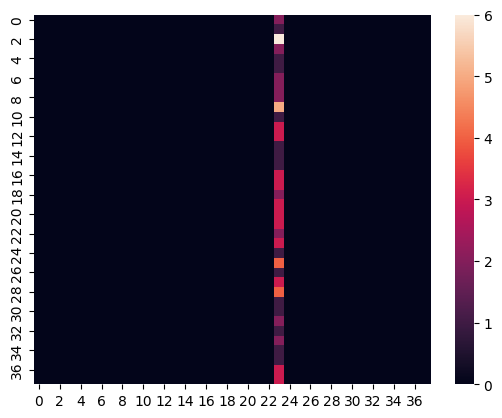

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

cm = confusion_matrix(yts,pred1)
heatmap(cm)

accuracy = float(cm.diagonal().sum())/len(yts)
print("Accuracy : ", accuracy)

Results : EPOCHS = 20
- CNN pure : acc = 0.40 (0.28)
- CNN brk + svm (sans dense) : acc = 0.367
- 2 dense (4000 + 2000 ) + svm : acc = 0.44  (0.01)
- 1 dense (4000) + svm : acc = 0.61

- 2 dense + wavelet + svm : acc = 0.005319148936170213
- 1 dense + wavelet + svm : acc = 0.015957446808510637

Conclusion : mafihach wavelet for feature extraction
i think we need ndiro cross validation psk kolma ybdl chwiya fhadak train testsplit ytbdl l resultat bzaaaaf ...